In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Ml Project/adult-2.csv" )

# **EDA**

In [21]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
df.shape

(32561, 15)

In [23]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [24]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

# **Replacing "?" value to null values**

In [25]:
df[df=='?']=np.nan

In [26]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [27]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [29]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Visulazation**

<Figure size 2000x2000 with 0 Axes>

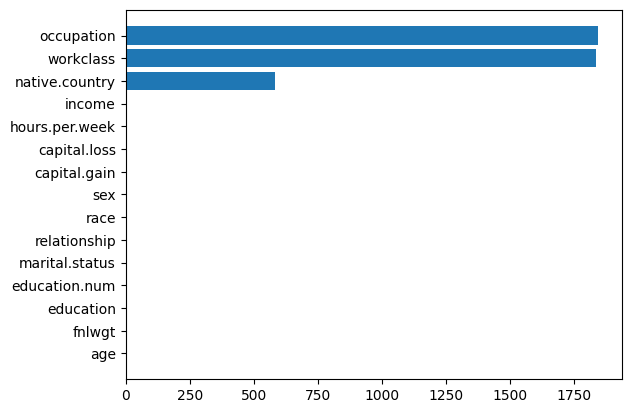

<Figure size 2000x2000 with 0 Axes>

In [30]:
temp = df.isnull().sum().sort_values()
plt.barh(temp.index,temp  )
plt.figure(figsize=(20,20))

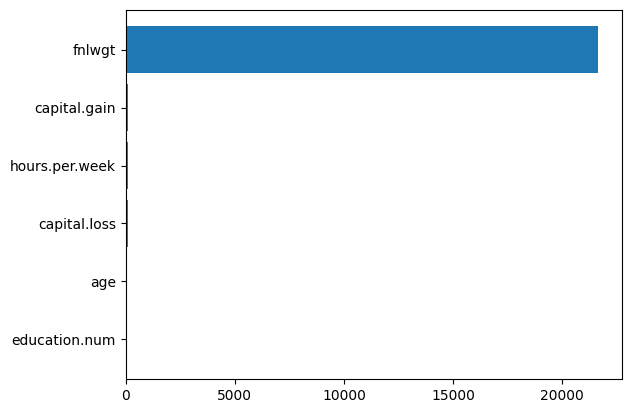

<Figure size 1000x1000 with 0 Axes>

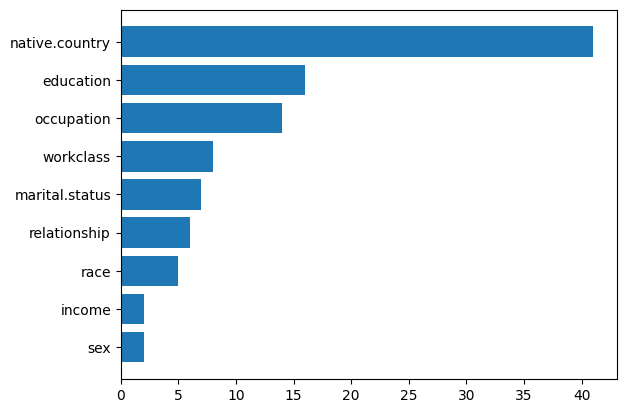

<Figure size 2000x2000 with 0 Axes>

In [31]:
temp1 = df.select_dtypes(include='number').nunique().sort_values()
plt.barh(temp1.index ,temp1  )
plt.figure(figsize=(10,10))
plt.show()
temp2 = df.select_dtypes(exclude='number').nunique().sort_values()
plt.barh(temp2.index ,temp2   )
plt.figure(figsize=(20,20))
plt.show()

In [32]:
from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name '_df_8' is not defined

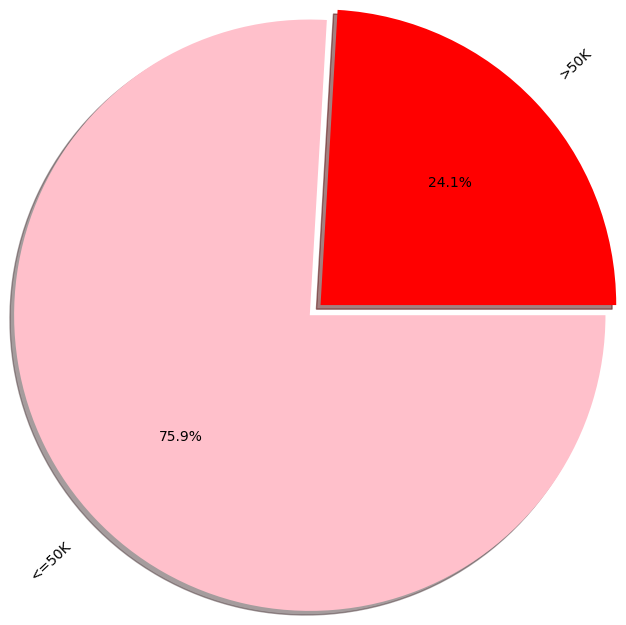

In [34]:
temp = df['income'].value_counts().sort_values()
explode =[0,0.1]
plt.pie(temp,labels=temp.index, radius=2, colors=['red','pink'], shadow=True,rotatelabels=True , autopct='%1.1f%%',explode=explode)
plt.show()


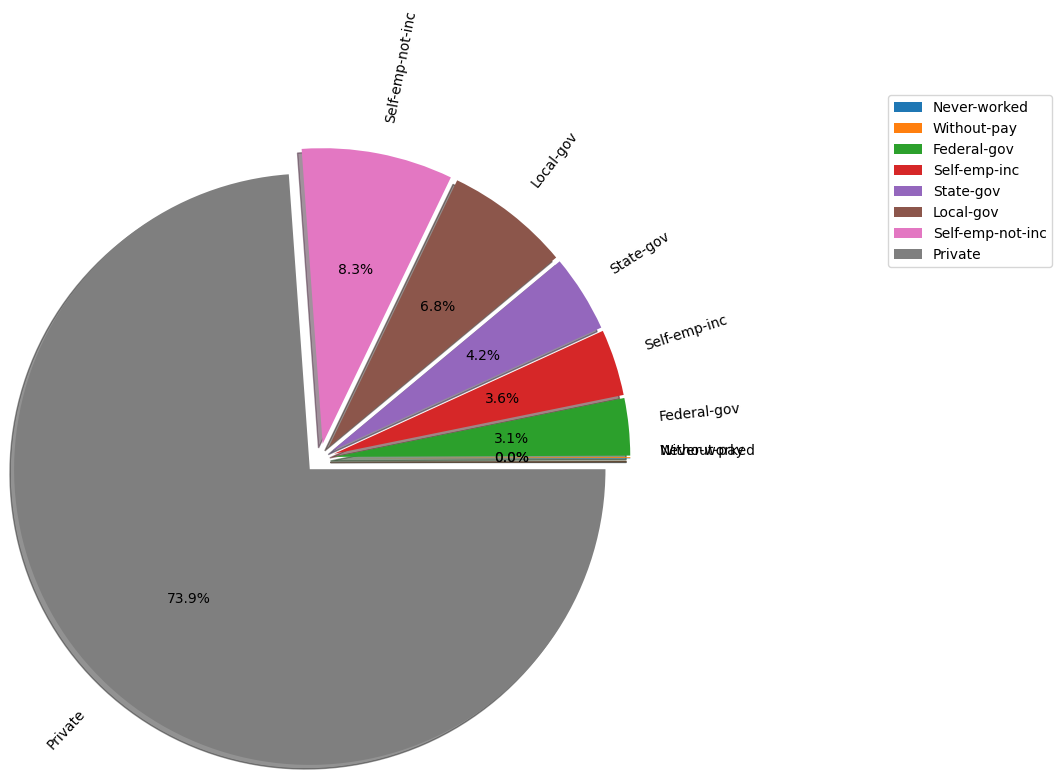

In [35]:
temp = df['workclass'].value_counts().sort_values()


explode =[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(temp, labels = temp.index , radius=2, shadow=True,rotatelabels=True , autopct='%1.1f%%', explode=explode  )
plt.legend(loc ="right" , bbox_to_anchor=(2, 1, 0.5, 0.5))

plt.show()


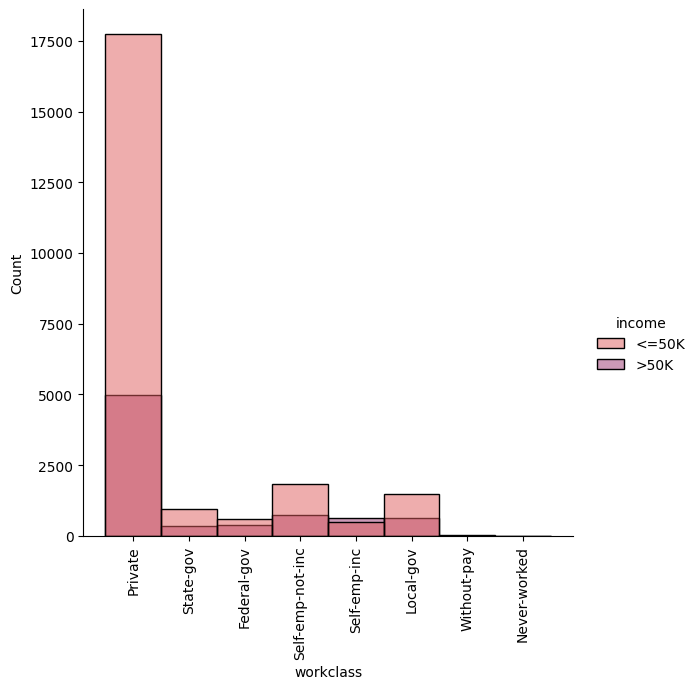

In [36]:
sns.displot(df,x='workclass' , hue='income' , palette = "flare"  , height= 6 )
plt.xticks(rotation = 90)
plt.show()

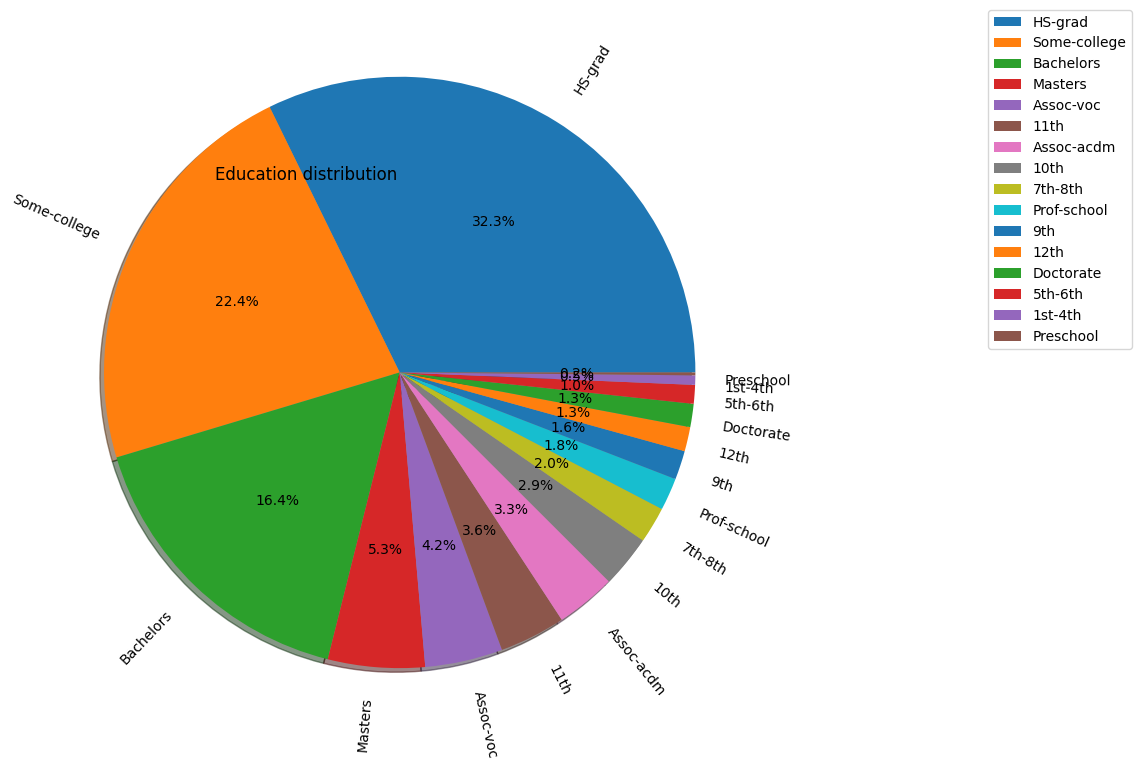

In [37]:
temp = df['education' ].value_counts()


plt.pie(temp, radius=2, labels=temp.index , shadow=True,rotatelabels=True , autopct='%1.1f%%' )
plt.legend(loc='upper right' , bbox_to_anchor=(2, 1, 0.5, 0.5))

plt.title("Education distribution" ,loc='left' )
plt.show()

# **Dealing with null values**

In [38]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [39]:
df=df.dropna()

In [40]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

**Distribution Plot**

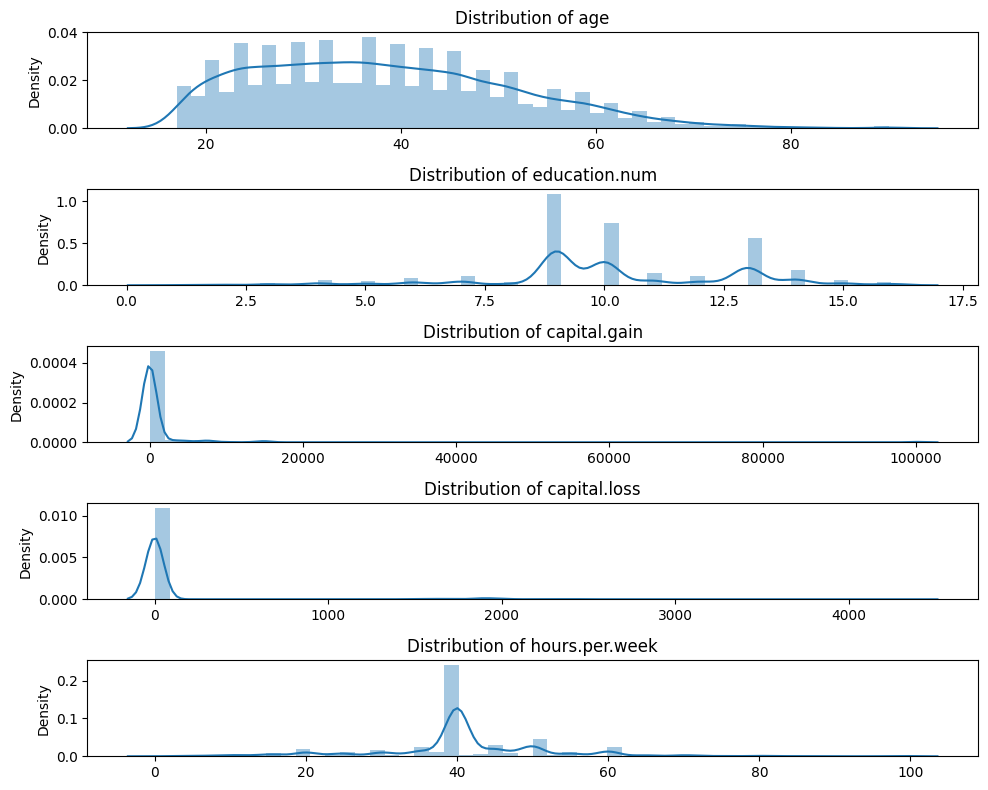

In [41]:
numerical_columns = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))

# Looping through each numerical column
for i, column in enumerate(numerical_columns):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

**Pair Plot**

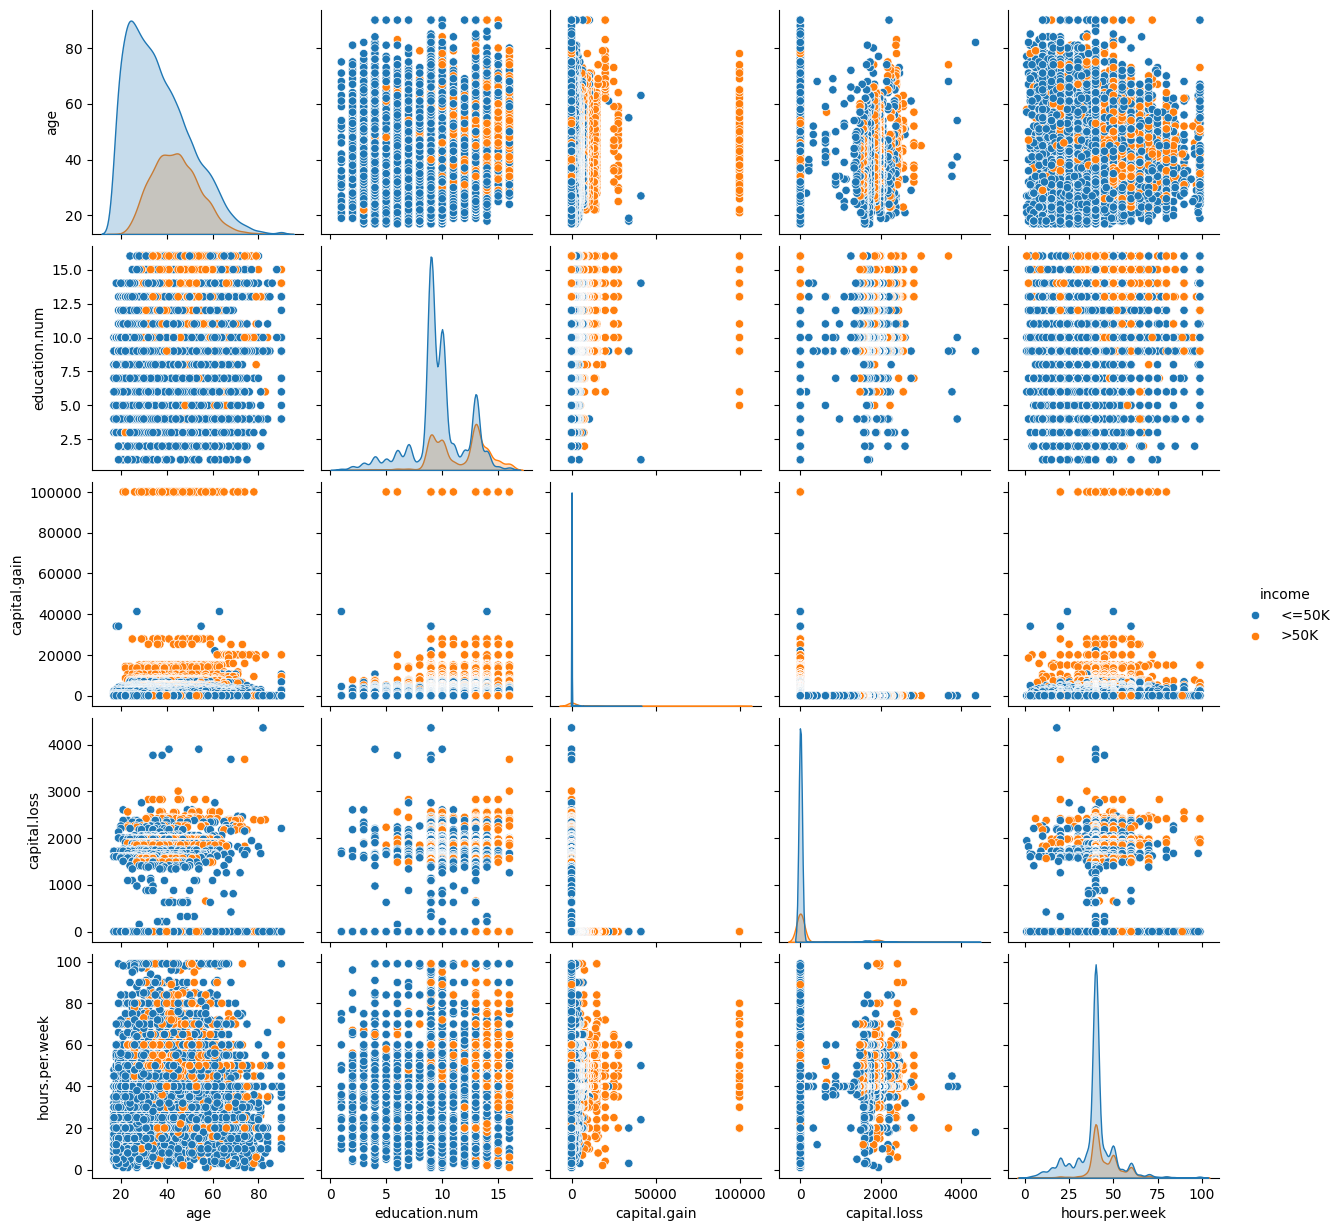

In [42]:
# Selecting numerical columns
numerical_columns = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']

# Creating a pair plot
sns.pairplot(df[numerical_columns], hue='income', diag_kind='kde')
plt.show()


**Scaling income column**

In [43]:
df['income'] = df['income'].replace('<=50K' , 0)
df['income'] = df['income'].replace('>50K' , 1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


# **Checking Multicollinearity**

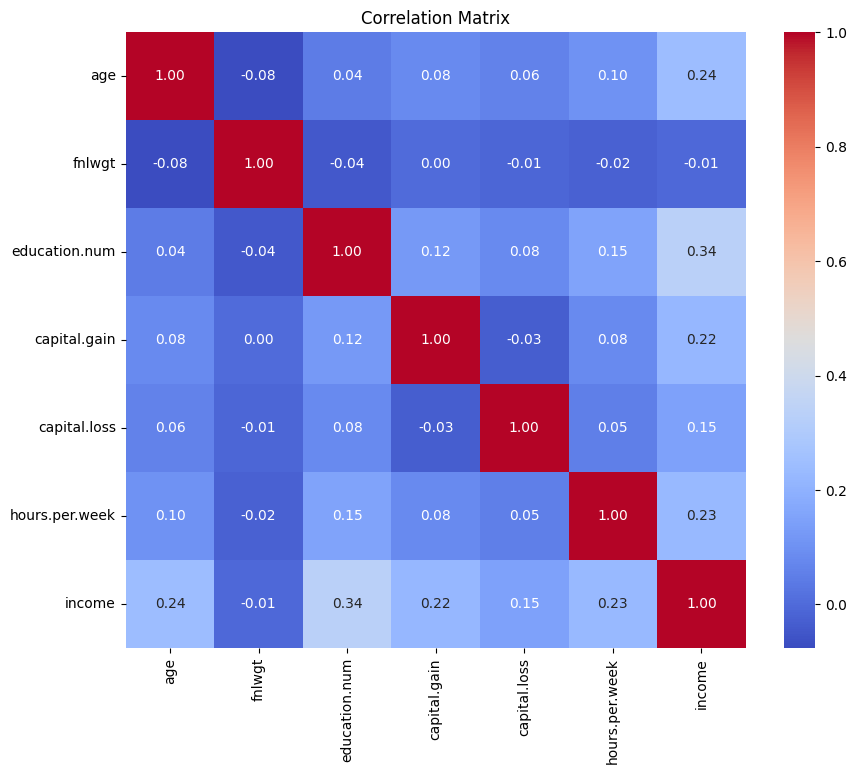

In [45]:
numerical_columns = df.select_dtypes(include=['int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Multicollinearity refers to the phenomenon in which two or more independent variables in a regression model are highly correlated with each other. This correlation can cause issues in the model, such as unstable parameter estimates and difficulty in interpreting the effects of individual predictors on the dependent variable. It doesn't affect the predictive accuracy of the model, but it can impact the reliability of the coefficient estimates and lead to misleading interpretations. Detecting multicollinearity is essential in regression analysis, and techniques like variance inflation factor (VIF) are often used to identify and address it by removing or combining correlated predictors.

**Droping column 'fnlwgt' as correlation is very low**

In [46]:
df = df.drop('fnlwgt', axis=1)


### **Labeling or Scaling the data**

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])

In [50]:
X = df.drop('income' , axis =1 )
y = df['income']

In [51]:
accuracy_dict = {}

This code snippet performs both labeling and splitting of data for machine learning tasks. Firstly, it imports the LabelEncoder class from sklearn.preprocessing, which is a module for data preprocessing tasks in Python's scikit-learn library. Then, it initializes an instance of LabelEncoder as le.

Following that, the code applies the fit_transform() method of the LabelEncoder instance le to each categorical column in the DataFrame df. Each categorical column such as 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', and 'native.country' is transformed into numerical labels. This process is crucial as many machine learning algorithms require numerical input data.

**Spliting the data in  Train and Test**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train , X_test ,  y_train , y_test = train_test_split(X, y ,test_size=0.6 ,random_state=50)

# **Logistic Reggression Approach**

Logistic regression is a statistical model used for binary classification tasks, predicting the probability that an instance belongs to a particular class (usually 0 or 1). It employs the logistic function to map input features to probabilities, estimating the likelihood of each class. Unlike linear regression, it models the probability of the dependent variable using a logistic function, allowing for nonlinear relationships between features and the target. Parameters are optimized using maximum likelihood estimation, often via gradient descent. It's widely used in various fields due to its simplicity, interpretability, and effectiveness in modeling binary outcomes.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lrclassifier = LogisticRegression(random_state = 0)
lrclassifier.fit(X_train, y_train)
y_pred = lrclassifier.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
accuracy_dict["Logistic"] = metrics.accuracy_score(y_test, y_pred)

ACCURACY OF THE MODEL:  0.7998121339374517


# **RandomForest  Approach**

Random Forest is a versatile ensemble learning technique used for both classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the mode (for classification) or mean prediction (for regression) of the individual trees. Each tree is built on a random subset of the training data and features, promoting diversity and reducing overfitting. During prediction, input data traverse through each tree, and the final prediction is determined by aggregating the predictions of all trees. This method is robust, handles high-dimensional data well, and provides insights into feature importance, making it popular in various machine learning applications.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfclassifier = RandomForestClassifier(random_state = 0)
rfclassifier.fit(X_train, y_train)
y_pred = rfclassifier.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
accuracy_dict["Random Forest"] = metrics.accuracy_score(y_test, y_pred)

ACCURACY OF THE MODEL:  0.8447342247762184


**XGBoost algorithm**

XGBoost, or Extreme Gradient Boosting, is a powerful machine learning algorithm renowned for its predictive performance and scalability. It sequentially builds an ensemble of weak predictive models, like decision trees, and optimizes their combination to minimize a predefined loss function. With efficient implementations and regularization techniques, XGBoost prevents overfitting and handles large datasets effectively. Its versatility, speed, and ability to handle diverse machine learning tasks make it a popular choice among practitioners for classification, regression, and ranking problems, consistently delivering state-of-the-art results across various domains and competitions.




In [56]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [57]:
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_dict["XgBoost"] = accuracy

Accuracy: 0.8673959887286591


**Gradient Decent Boost**

Gradient Descent Boosting, a type of ensemble learning, iteratively combines weak predictive models to create a stronger overall model. It minimizes a predefined loss function by adjusting the weights of these models, prioritizing the correction of errors made by previous models. Each subsequent model focuses on the mistakes of its predecessors, gradually improving predictive accuracy. Gradient Descent Boosting's key feature is its use of gradient descent optimization to update model parameters, efficiently navigating the model's parameter space. This iterative process results in a robust and accurate predictive model capable of handling complex datasets and achieving high performance in various machine learning tasks.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# For simplicity, let's assume there's no missing data and all features are numeric.
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Gradient Boosting model using gradient descent
# You can customize the parameters according to your requirement
model = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_dict["Gradient Descent"] = accuracy

Accuracy: 0.8564561577987734


**Multiple Linear Regression**

Multiple Linear Regression is a statistical technique used to model the relationship between multiple independent variables and a single dependent variable. It extends simple linear regression by incorporating multiple predictors to predict the outcome variable. The model assumes a linear relationship between the predictors and the target variable, with each predictor contributing a weighted sum to the final prediction. These weights are estimated using the method of least squares, minimizing the difference between the observed and predicted values. Multiple Linear Regression is widely used for prediction and inference in various fields, providing insights into the influence of multiple factors on an outcome.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For simplicity, let's assume there's no missing data and all features are numeric.
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.1405299173743587


**Naive Bayes**

Naive Bayes is a simple yet powerful probabilistic classifier based on Bayes' theorem with strong independence assumptions between features. It assumes that the presence of a particular feature in a class is independent of the presence of other features, hence "naive." Despite this simplification, Naive Bayes often performs well in classification tasks, especially in text classification and spam filtering. It calculates the probability of each class given a set of features and selects the class with the highest probability. Naive Bayes is computationally efficient, easy to implement, and requires a small amount of training data, making it suitable for real-time applications and large datasets.

In [60]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# For simplicity, let's assume there's no missing data and all features are numeric.
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_dict["Naive Bayes"] = accuracy

Accuracy: 0.7904856621912812


**Bernoulli Naive Bayes:**


Bernoulli Naive Bayes is a variant of Naive Bayes specifically designed for binary feature data, often used in text classification tasks like sentiment analysis or spam detection. It assumes that features are independent Boolean variables, indicating the presence or absence of a particular term in a document. By applying Bayes' theorem with a Bernoulli distribution assumption, it calculates the likelihood of each class given the presence or absence of features. Despite its simplicity and the assumption of independence, Bernoulli Naive Bayes can provide effective classification results, especially when dealing with high-dimensional, sparse datasets typical in text analysis.

In [61]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer

# For simplicity, let's assume there's no missing data and all features are numeric.
X = df.drop(columns=['income'])  # Features
y = df['income']  # Target variable

# Binarize features assuming they are binary (e.g., 0 or 1)
binarizer = Binarizer()
X_binary = binarizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Build and train the Bernoulli Naive Bayes model
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_dict["Bernoulli Naive Bayes"] = accuracy

Accuracy: 0.71026023537212


**GRAPHICAL REPRESENTAION**

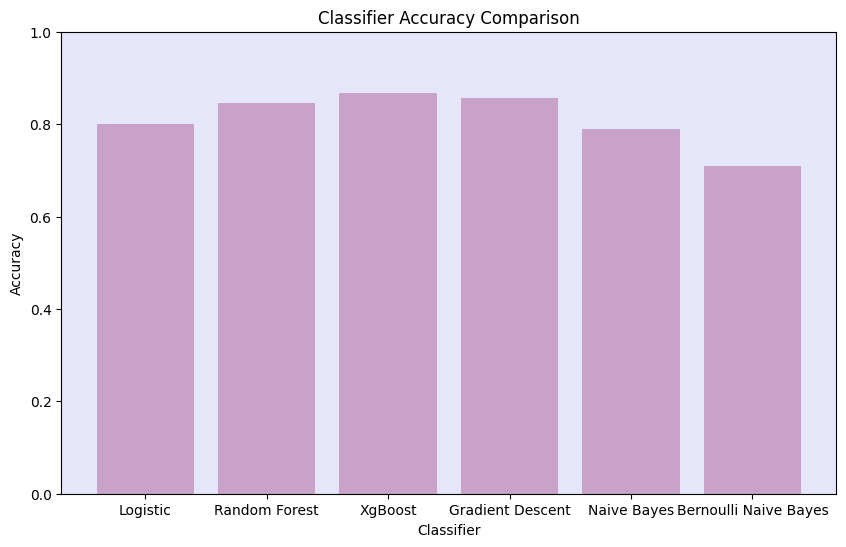

In [62]:
plt.figure(figsize=(10, 6))
# Set a custom background color for the entire bar chart
plt.gca().set_facecolor('lavender')
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='#c8a2c8')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limit to ensure proper scale (0 to 1)
plt.show()

In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer